# Stochastic differential equations
### Kirill Zakharov

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
plt.style.use("ggplot")

# Wiener process

In [134]:
def wiener_process(dt=0.01, x0=0, Nt=1000):
    res = [x0]
    x = x0
    
    for _ in range(1, Nt):
        rand_v = sts.norm(0, 1)
        x = x + np.sqrt(dt)*rand_v.rvs()
        res.append(x)
        
    return res

In [135]:
Nt = 1000
wp = wiener_process(0.01, 0, Nt)

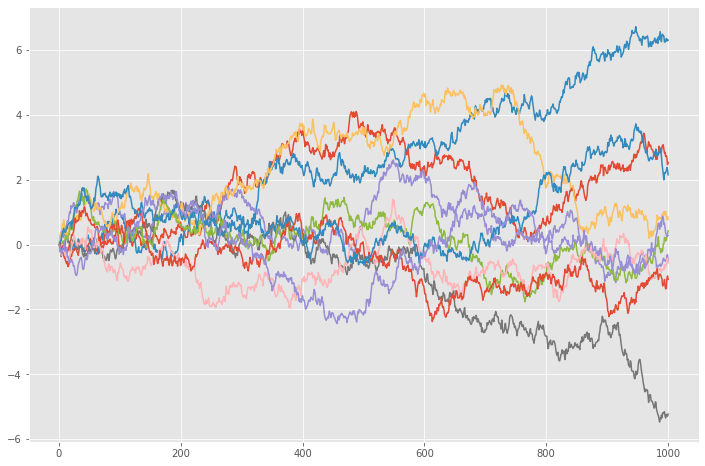

In [142]:
time = np.linspace(1, 1000, Nt)
plt.subplots(figsize=(12,8))
for _ in range(10):
    wp = wiener_process(0.01, 0, Nt)
    plt.plot(time, wp)
plt.show()

In [129]:
t = 100
rand_eta = sts.norm(0, 1)
wp[t]*t/2 + (rand_eta.rvs()*t**(3/2))/(2*np.sqrt(3))

-530.669393347001

## Logarithmic motion

In [180]:
mu = 0.3
sigma = 0.1
x0 = 3
def log_motion(dt=0.01, x0=1, Nt=1000):
    res = [x0]
    x = x0
    
    for _ in range(1, Nt):
        rand_v = sts.norm(0, 1)
        x = x + mu*x*dt + sigma*x*np.sqrt(dt)*rand_v.rvs()
        res.append(x)
        
    return res

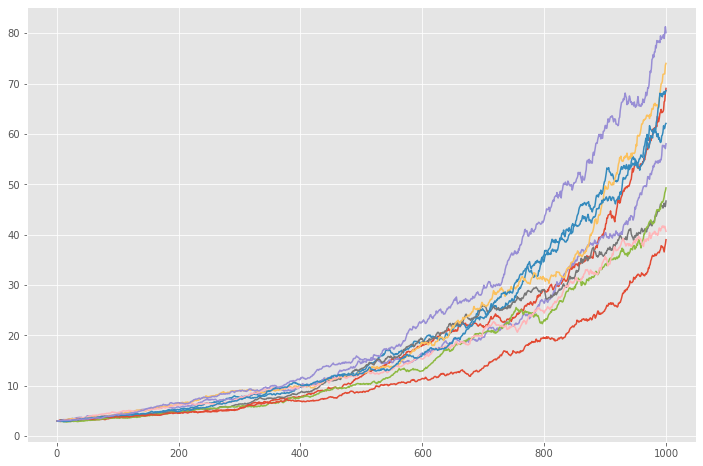

In [181]:
time = np.linspace(1, 1000, Nt)
plt.subplots(figsize=(12,8))

for _ in range(10):
    wp = log_motion(0.01, x0, Nt)
    plt.plot(time, wp)
plt.show()

In [174]:
# Mean value at the moment t
#x0*np.exp(mu*t)
x0*np.exp(mu*500)

2.167792130437725e+87

In [173]:
t = 999
rand_eta = sts.norm(0, 1)
wp[t]*t/2 + (rand_eta.rvs()*t**(3/2))/(2*np.sqrt(3))

-1557.6317323640349

## Brownian bridge

In [221]:
alpha = 1
sigma = 0.1
x0 = 2
Nt = 200
def brownian_bridge(dt=0.01, x0=1, Nt=1000):
    res = [x0]
    x = x0
    
    for t in range(1, Nt):
        rand_v = sts.norm(0, 1)
#         x = x - (x-alpha)*dt/(Nt-t) + (Nt-t)*sigma*np.sqrt(dt)*rand_v.rvs()
        x = alpha + (x0-alpha)*(Nt-t)/Nt + sigma*np.sqrt(t*(Nt-t)/Nt)*rand_v.rvs()
        res.append(x)
        
    return res

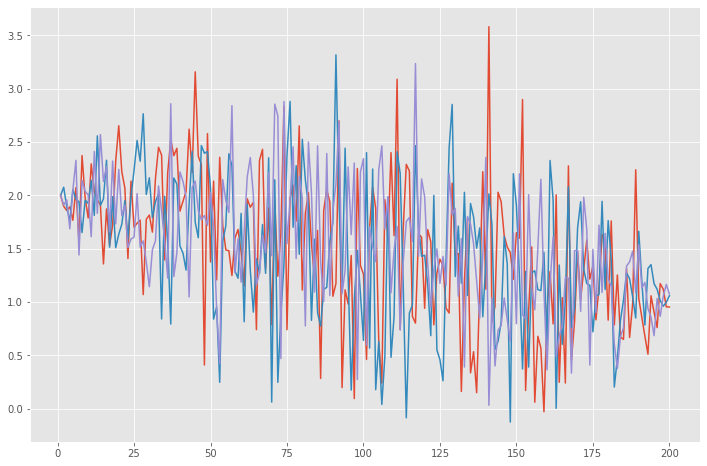

In [222]:
time = np.linspace(1, Nt, Nt)
plt.subplots(figsize=(12,8))

for _ in range(3):
    wp = brownian_bridge(0.01, x0, Nt)
    plt.plot(time, wp)
plt.show()

In [197]:
def x(t):
    rand_v = sts.norm(0, 1)
    return alpha + (x0-alpha)*(Nt-t)/Nt + sigma*np.sqrt(t*(Nt-t)/Nt)*rand_v.rvs()

In [198]:
x(1000)

1.0

In [233]:
#Runge-Kutt method
def runge_Kutt(f, t0, x0, h, b):
    t = t0
    x = x0
    array = np.array([])
    arrayx = np.array([])
    while t<b:
        k1 = f(t, x)
        k2 = f(t + h/2,x + (h*k1)/2)
        k3 = f(t + h/2,x + (h*k2)/2)
        k4 = f(t + h,x + h*k3)
        x = x + h*(k1 + 2*k2 + 2*k3 + k4)/6
        array = np.append(array, t)
        arrayx = np.append(arrayx, x)
        t += h
    return array, arrayx

def f(t, x):
    return np.sin(t)*x

def f_stoh(t, x):
#     rv = sts.uniform(-1, 1)
    rand_v = sts.norm(0, 1)
    d = alpha + (x0-alpha)*(Nt-t)/Nt + sigma*np.sqrt(t*(Nt-t)/Nt)*rand_v.rvs()
    return 0.2*x + d

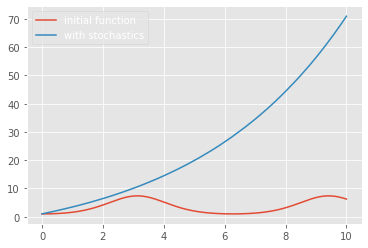

In [240]:
p1, p2 = runge_Kutt(f, 0, 1, 0.01, 10)
p1S, p2S = runge_Kutt(f_stoh, 0, 1, 0.01, 10)

plt.plot(p1, p2, label='initial function')
plt.plot(p1S, p2S, label='with stochastics')
plt.legend()
plt.show()